In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets,layers, models

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 53s 0us/step


In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
classes[6]

'frog'

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
     

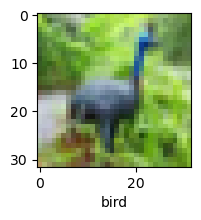

In [15]:
plot_sample(X_train, y_train, 6)

In [16]:
X_train = X_train/255
X_test = X_test/255

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5


2024-06-28 19:33:12.912603: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 18s 11ms/step - loss: 1.8127 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6226 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5417 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4799 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4341 - accuracy: 0.4949


In [19]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4650 - accuracy: 0.4717


[1.4650367498397827, 0.4717000126838684]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.41      0.51      1000
           1       0.63      0.58      0.61      1000
           2       0.38      0.34      0.36      1000
           3       0.33      0.20      0.25      1000
           4       0.39      0.48      0.43      1000
           5       0.30      0.56      0.39      1000
           6       0.55      0.45      0.50      1000
           7       0.66      0.41      0.50      1000
           8       0.54      0.69      0.61      1000
           9       0.51      0.60      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [28]:
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4415 - accuracy: 0.4838
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0883 - accuracy: 0.6178
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9665 - accuracy: 0.6628
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8839 - accuracy: 0.6922
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8138 - accuracy: 0.7168
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7610 - accuracy: 0.7354
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7055 - accuracy: 0.7557
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6647 - accuracy: 0.7677
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6202 - accuracy: 0.7821
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.579

In [33]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9620 - accuracy: 0.6936


[0.9619519710540771, 0.6935999989509583]

In [34]:
y_test = y_test.reshape(-1,)

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.46663457e-04, 2.36643900e-05, 2.31113238e-03, 8.21578503e-01,
        4.85899000e-05, 7.68162683e-02, 9.83483568e-02, 8.62092129e-05,
        5.87241550e-04, 5.34199498e-05],
       [1.98405143e-03, 1.31326452e-01, 7.00257345e-08, 3.52762072e-07,
        2.60604027e-09, 3.97285973e-08, 1.08442615e-08, 4.73384006e-07,
        8.66683602e-01, 4.90816274e-06],
       [2.07127705e-02, 4.97170389e-02, 3.77353106e-04, 4.82362229e-03,
        8.09027042e-05, 4.93542873e-04, 1.58338036e-04, 3.08314309e-04,
        9.21706975e-01, 1.62114250e-03],
       [7.87814200e-01, 9.07581765e-03, 9.77001712e-02, 5.68763725e-03,
        1.27364779e-02, 2.46450782e-05, 1.87872187e-03, 1.18216814e-03,
        8.22326913e-02, 1.66752026e-03],
       [1.25169677e-07, 1.77268084e-05, 3.84698436e-03, 2.65236702e-02,
        5.40236473e-01, 4.85652301e-04, 4.28858966e-01, 1.48152021e-05,
        9.40925111e-06, 6.22111702e-06]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [38]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

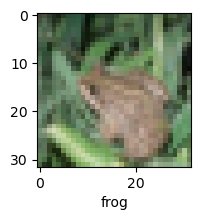

In [43]:
plot_sample(X_test, y_test, 4)

In [44]:
classes[y_classes[4]]

'deer'

In [45]:
print('classification Report: \n', classification_report(y_test, y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      1000
           1       0.86      0.77      0.81      1000
           2       0.59      0.60      0.59      1000
           3       0.51      0.54      0.52      1000
           4       0.66      0.63      0.64      1000
           5       0.54      0.64      0.59      1000
           6       0.73      0.81      0.77      1000
           7       0.81      0.67      0.73      1000
           8       0.80      0.81      0.81      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000

